In [2]:
import cv2
from enum import Enum
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import json
import os

def calculate_ground_truth_iou(detect_box,ground_truth_box):
    xmin1, ymin1, xmax1, ymax1 = detect_box
    xmin2, ymin2, xmax2, ymax2 = ground_truth_box
    x_overlap = max(0, min(xmax1, xmax2) - max(xmin1, xmin2))
    y_overlap = max(0, min(ymax1, ymax2) - max(ymin1, ymin2))
    intersection = x_overlap * y_overlap
    union = (xmax1 - xmin1) * (ymax1 - ymin1) + (xmax2 - xmin2) * (ymax2 - ymin2) - intersection
    return float(intersection) / union
label_folder = "../images/labels/"
image_folder = "../images/Flood/"
keypoint_result_folder = "../result_keypoint/"
mask_result_folder = "../result_mask/"
project_result_folder = "../result_project/"

file_names = os.listdir(image_folder)

ground_truth_waterlevels = []
predicted_waterlevels = []
waterlevel_errors = []

for image_name in file_names:
    
    base_name = os.path.splitext(image_name)[0]
    single_folder = project_result_folder+base_name+"/"
    label_name = base_name+".json"

    with open(single_folder+base_name+".json") as file:
        data = json.load(file)
        cars_data = data["cars"]

    with open(label_folder+label_name) as file:
        data = json.load(file)
        ground_truth = data['objects']

    for car in cars_data:
        box = car['box']
        

        max_iou = 0
        found = False
        for gt in ground_truth:
            iou = calculate_ground_truth_iou(box,gt['bbox'])
            if iou > max_iou:
                max_iou = iou
                the_gt = gt
                found = True
        if found: 
            ground_truth.remove(the_gt)
            pred_wl = car['water_level']
            gt_wl = int(the_gt['water_level']) / 100
            predicted_waterlevels.append(pred_wl)
            ground_truth_waterlevels.append(gt_wl)
            waterlevel_errors.append(abs(pred_wl-gt_wl))

In [13]:
group_0 = []
group_1 = []
group_2 = []
group_3 = []
group_4 = []
for pred_wl,gt_wl,err in zip(predicted_waterlevels,ground_truth_waterlevels,waterlevel_errors):
    if gt_wl < 0.2:
        group_0.append(err)
    elif gt_wl < 0.4:
        group_1.append(err)
    elif gt_wl < 0.6:
        group_2.append(err)
    elif gt_wl < 0.8:
        group_3.append(err)
    else:
        group_4.append(err)


In [14]:
means = [sum(group_0) / len(group_0),\
        sum(group_1) / len(group_1),\
        sum(group_2) / len(group_2),\
        sum(group_3) / len(group_3),\
        sum(group_4) / len(group_4)]

counts = [len(group_0),len(group_1),len(group_2),len(group_3),len(group_4)]

In [25]:
means

[0.07318681318681317,
 0.2773333333333333,
 0.47000000000000003,
 0.6693749999999999,
 0.975]

In [26]:
counts

[91, 30, 9, 16, 6]

In [28]:
group_0 = []
group_1 = []
group_2 = []
group_3 = []
group_4 = []
group_5 = []
for pred_wl,gt_wl,err in zip(predicted_waterlevels,ground_truth_waterlevels,waterlevel_errors):
    if err < 0.1:
        group_0.append(err)
    elif err < 0.2:
        group_1.append(err)
    elif err < 0.3:
        group_2.append(err)
    elif err < 0.4:
        group_3.append(err)
    elif err < 0.5:
        group_4.append(err)
    else:
        group_5.append(err)

In [29]:
counts = [len(group_0),len(group_1),len(group_2),len(group_3),len(group_4),len(group_5)]

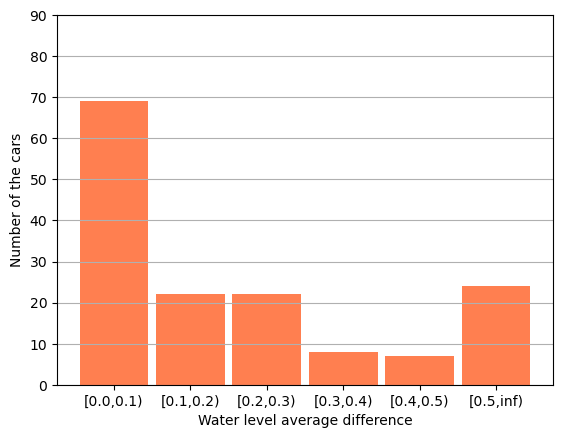

In [39]:
plt.figure()
plt.grid(axis='y')
plt.bar(range(len(counts)), counts,0.9,fc='coral')
plt.xlabel('Water level average difference')
plt.ylabel('Number of the cars')
plt.xticks(range(len(counts)),['[0.0,0.1)','[0.1,0.2)','[0.2,0.3)','[0.3,0.4)','[0.4,0.5)','[0.5,inf)'])
plt.yticks(np.arange(0, 100, 10))
plt.savefig("../result/plot.jpg",dpi=200,pad_inches=0.0)